<a href="https://colab.research.google.com/github/aline-evelyn/Banco_Carrefour_Data_Engineer/blob/main/Aulas4_e_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalhando com Planilhas no Excel

In [2]:
#importanto a biblioteca
import pandas as pd

In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as ultimas 5 linhas dos df
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Amostra de 5 linhas aleatórias do df
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
4,Salvador,2019-02-14,19.47,1037,3
72,Fortaleza,2019-01-01,106.72,1003,4
236,Salvador,2019-01-03,126.29,1035,3
125,Recife,2019-03-02,37.60,983,4
50,Recife,2019-01-01,7.24,983,4


In [9]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [15]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace = True)

In [16]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [17]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace = True)

In [18]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

CRIANDO COLUNAS NOVAS

In [19]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df['Qtde'])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
df['Receita/Vendas(quantidade)'] = df['Receita'] / df['Vendas']

In [22]:

df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade)
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [23]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [24]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [25]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade)
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [26]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade)
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
#Agrupamento por cidade
df.groupby('Cidade')["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade)
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas


In [29]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [30]:
#Vefificando a coluna de data em tipo inteiro
df.dtypes

Cidade                         object
Data                            int64
Vendas                        float64
LojaID                         object
Qtde                            int64
Receita                       float64
Receita/Vendas(quantidade)    float64
dtype: object

In [32]:
#Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [33]:
df.dtypes

Cidade                                object
Data                          datetime64[ns]
Vendas                               float64
LojaID                                object
Qtde                                   int64
Receita                              float64
Receita/Vendas(quantidade)           float64
dtype: object

In [35]:
#Agrupamento po ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
#criando uma nova coluna com o ano
df['Ano_Venda']  = df['Data'].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019
33,Recife,2019-01-01,32.33,982,1,32.33,1.0,2019
106,Recife,2019-01-01,30.46,982,3,91.38,3.0,2019
24,Fortaleza,2019-01-01,35.38,1005,4,141.52,4.0,2019
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019


In [39]:
#extraindo o mes e o dia da venda
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda,mes_venda,dia_venda
210,Natal,2019-01-02,197.64,1035,1,197.64,1.0,2019,1,2
231,Salvador,2019-01-03,89.85,1034,2,179.70,2.0,2019,1,3
21,Recife,2019-01-01,164.74,983,1,164.74,1.0,2019,1,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2
99,Recife,2019-01-01,136.72,980,4,546.88,4.0,2019,1,1


In [41]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
#Calculando a diferena de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda,mes_venda,dia_venda,diferenca_dias
80,Fortaleza,2019-01-01,47.88,1003,2,95.76,2.0,2019,1,1,365 days
12,Salvador,2019-01-01,125.05,1034,3,375.15,3.0,2019,1,1,365 days
170,Natal,2019-01-02,9.26,1035,3,27.78,3.0,2019,1,2,366 days
153,Salvador,2019-01-02,17.41,1035,2,34.82,2.0,2019,1,2,366 days
11,Salvador,2019-01-01,30.62,1034,3,91.86,3.0,2019,1,1,365 days


In [44]:
#Criando a coluna de trimestre
df['semestre_venda'] = df['Data'].dt.quarter

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
54,Natal,2018-10-03,373.00,852,4,1492.00,4.0,2018,10,3,275 days,4
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2.0,2019,3,9,432 days,1
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018,1,1,0 days,1
67,Natal,2019-02-14,379.00,852,2,758.00,2.0,2019,2,14,409 days,1


In [47]:
#filtrando as vendas de março 2019
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [48]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [49]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas(quantidade),Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
131,Fortaleza,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,2019,3,17,440 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1


Visualização de dados

In [50]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

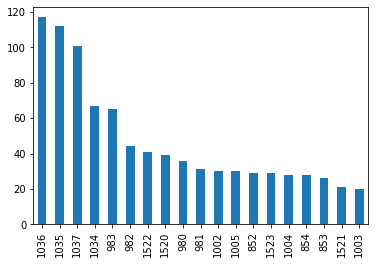

In [53]:
#Gráfico de Barras
df['LojaID'].value_counts(ascending=False).plot.bar()

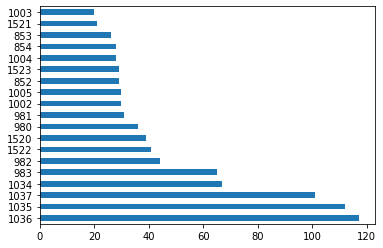

In [54]:
#Gráfico de barras horizontais
df['LojaID'].value_counts().plot.barh()

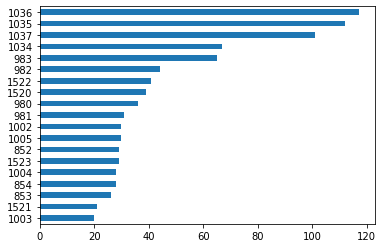

In [57]:
df['LojaID'].value_counts(ascending=True).plot.barh();

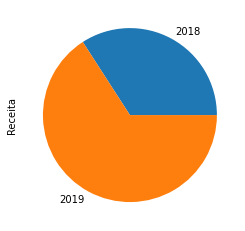

In [58]:
#Grafico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [61]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

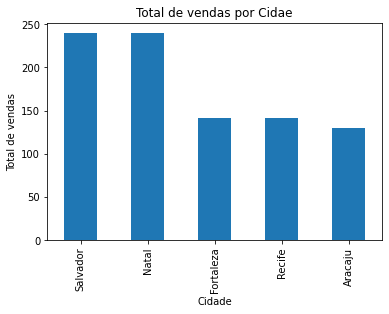

In [63]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por Cidae')
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

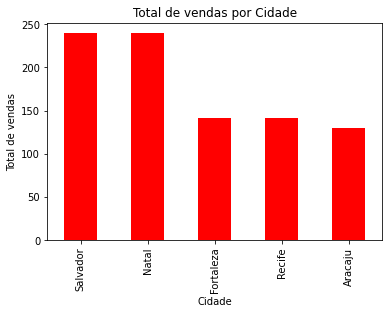

In [65]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por Cidade', color='red')
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [66]:
#alterando o estilo
plt.style.use('ggplot')

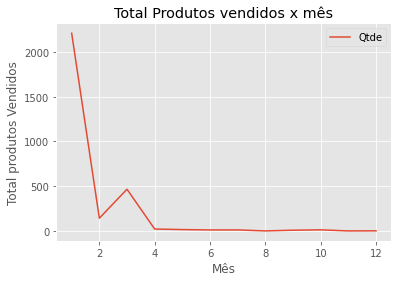

In [68]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel('Mês')
plt.ylabel('Total produtos Vendidos')
plt.legend();

In [69]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [70]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [71]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

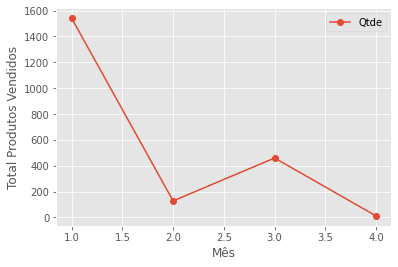

In [72]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

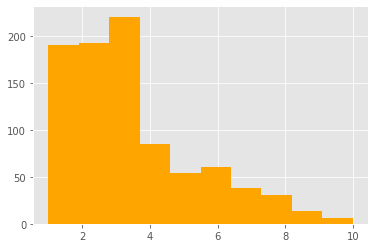

In [74]:
#Histograma
plt.hist(df['Qtde'], color='orange');

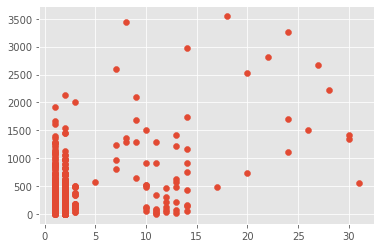

In [75]:
#Dispersão
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

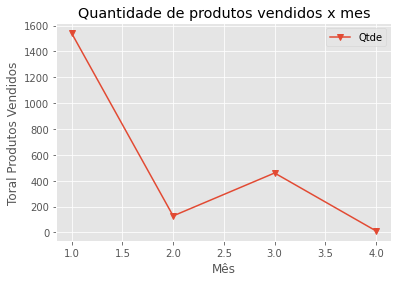

In [77]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title("Quantidade de produtos vendidos x mes")
plt.xlabel("Mês")
plt.ylabel("Toral Produtos Vendidos")
plt.legend()
plt.savefig('Gráfico QTDE X Mês.png')